# Read and explore your data

In [1]:
# Import pandas 
import pandas as pd
import numpy as np

# Use pandas to read in recent_grads_url
recent_grads = pd.read_csv('recent_grads.csv')

# Print the shape
print(recent_grads.shape)

(173, 21)


# Exploring Your Data

In [9]:
# Print .dtypes
print(recent_grads.dtypes)

# Output summary statistics
print(recent_grads.describe())

# Exclude data of type object
print(recent_grads.describe(exclude=['object']))

rank                      int64
major_code                int64
major                    object
major_category           object
total                     int64
sample_size               int64
men                       int64
women                     int64
sharewomen              float64
employed                  int64
full_time                 int64
part_time                 int64
full_time_year_round      int64
unemployed                int64
unemployment_rate       float64
median                   object
p25th                    object
p75th                    object
college_jobs              int64
non_college_jobs          int64
low_wage_jobs             int64
dtype: object
             rank   major_code          total  sample_size            men  \
count  173.000000   173.000000     173.000000   173.000000     173.000000   
mean    87.000000  3879.815029   39167.716763   356.080925   16637.358382   
std     50.084928  1687.753140   63354.613919   618.361022   28063.394844   
min   

# Replacing Missing Values

In [2]:
# Names of the columns we're searching for missing values 
columns = ['median', 'p25th', 'p75th']

# Take a look at the dtypes
print(recent_grads[columns].dtypes)

# Find how missing values are represented
print(recent_grads["median"].unique())

# Replace missing values with NaN
for column in columns:
    recent_grads.loc[recent_grads[column] == 'UN', column] = np.nan

median    object
p25th     object
p75th     object
dtype: object
['110000' '75000' '73000' '70000' '65000' 'UN' '62000' '60000' '58000'
 '57100' '57000' '56000' '54000' '53000' '52000' '51000' '50000' '48000'
 '47000' '46000' '45000' '44700' '44000' '42000' '41300' '41000' '40100'
 '40000' '39000' '38400' '38000' '37500' '37400' '37000' '36400' '36200'
 '36000' '35600' '35000' '34000' '33500' '33400' '33000' '32500' '32400'
 '32200' '32100' '32000' '31500' '31000' '30500' '30000' '29000' '28000'
 '27500' '27000' '26000' '25000' '23400' '22000']


# Select a Column

In [11]:
# Select sharewomen column
sw_col = recent_grads["sharewomen"]

# Output first five rows
print(sw_col[0:5])

0    0.120564
1    0.101852
2    0.153037
3    0.107313
4    0.341631
Name: sharewomen, dtype: float64


# Column Maximum Value

In [12]:
# Import numpy
import numpy as np

# Use max to output maximum values
max_sw = np.max(sw_col)

# Print column max
print(max_sw)

0.968953683


# Selecting a Row

In [13]:
# Output the row containing the maximum percentage of women
print(recent_grads[sw_col == max_sw])

     rank  major_code                        major             major_category  \
162   163        5502  ANTHROPOLOGY AND ARCHEOLOGY  Humanities & Liberal Arts   

     total  sample_size   men  women  sharewomen  employed      ...        \
162  38844          247  1167  36422    0.968954     29633      ...         

     part_time  full_time_year_round  unemployed  unemployment_rate  median  \
162      14515                 13232        3395           0.102792   28000   

     p25th  p75th college_jobs  non_college_jobs  low_wage_jobs  
162  20000  38000         9805             16693           6866  

[1 rows x 21 columns]


# Converting a DataFrame to Numpy Array

In [14]:
# Convert to numpy array
recent_grads_np = np.array(recent_grads[["unemployed", "low_wage_jobs"]])


# Print the type of recent_grads_np
print(type(recent_grads_np))

<class 'numpy.ndarray'>


# Correlation Coefficient

In [15]:
# Calculate correlation matrix
print(np.corrcoef(recent_grads_np[:,0], recent_grads_np[:,1]))

[[1.         0.95538815]
 [0.95538815 1.        ]]


# Creating Columns

In [16]:
# Add sharemen column
recent_grads['sharemen'] = recent_grads["men"] / recent_grads["total"]

In [17]:
# Add gender_diff column
# Add a column named gender_diff that reports how much higher the rate of women is than the rate of men
recent_grads['gender_diff'] = recent_grads["sharewomen"] - recent_grads['sharemen']

# Select Row with Highest Value

In [18]:
# Find the maximum percentage value of men
max_men = np.max(recent_grads["sharemen"])
 
# Output the row with the highest percentage of men
print(recent_grads[recent_grads["sharemen"] == max_men])

     rank  major_code                                       major  \
120   121        2301  EDUCATIONAL ADMINISTRATION AND SUPERVISION   

    major_category  total  sample_size    men  women  sharewomen  employed  \
120      Education    804            5  78253  63698    0.448732       703   

        ...       unemployed  unemployment_rate  median  p25th  p75th  \
120     ...                0                0.0   34000  29000  35000   

    college_jobs non_college_jobs low_wage_jobs   sharemen  gender_diff  
120          346              206           111  97.329602    -96.88087  

[1 rows x 23 columns]


# Updating columns

In [19]:
# Make all gender difference values positive
recent_grads['gender_diff'] = np.abs(recent_grads['gender_diff'])

# Find the 5 rows with lowest gender rate difference
print(recent_grads.nsmallest(5, 'gender_diff'))

    rank  major_code                                   major  \
8      9        2414                  MECHANICAL ENGINEERING   
74    75        5003                               CHEMISTRY   
37    38        6205                      BUSINESS ECONOMICS   
65    66        2599  MISCELLANEOUS ENGINEERING TECHNOLOGIES   
78    79        5506        POLITICAL SCIENCE AND GOVERNMENT   

       major_category   total  sample_size    men  women  sharewomen  \
8         Engineering   91227         1029  12953   2105    0.139793   
74  Physical Sciences   66530          353  32923  33607    0.505141   
37           Business   13302          199   3477   1154    0.249190   
65        Engineering    8804          125    124      0    0.000000   
78     Social Science  182621         1387  93880  88741    0.485930   

    employed     ...       unemployed  unemployment_rate  median  p25th  \
8      76442     ...             4650           0.057342   60000  48000   
74     48535     ...            

# Filtering rows

In [20]:
# Rows where gender rate difference is greater than .30 
diff_30 = recent_grads['gender_diff'] > .30

# Rows with more men
more_men = recent_grads['sharemen'] > recent_grads['sharewomen']

# Combine more_men and diff_30
more_men_and_diff_30 = np.logical_and(more_men, diff_30)

# Find rows with more men and and gender rate difference greater than .30
fewer_women = recent_grads[more_men_and_diff_30]

# Grouping with Counts

In [21]:
# Group by major category and count
print(recent_grads.groupby(['major_category']).major_category.count())
#print(recent_grads.groupby(['major_category']).count())


major_category
Agriculture & Natural Resources        10
Arts                                    8
Biology & Life Science                 14
Business                               13
Communications & Journalism             4
Computers & Mathematics                11
Education                              16
Engineering                            29
Health                                 12
Humanities & Liberal Arts              15
Industrial Arts & Consumer Services     7
Interdisciplinary                       1
Law & Public Policy                     5
Physical Sciences                      10
Psychology & Social Work                9
Social Science                          9
Name: major_category, dtype: int64


In [22]:
# Group departments that have less women by category and count
print(fewer_women.groupby(['major_category']).major_category.count())

major_category
Agriculture & Natural Resources         6
Biology & Life Science                  4
Business                                1
Computers & Mathematics                 5
Education                               5
Engineering                            20
Health                                  1
Humanities & Liberal Arts               1
Industrial Arts & Consumer Services     3
Interdisciplinary                       1
Law & Public Policy                     1
Physical Sciences                       6
Psychology & Social Work                2
Social Science                          4
Name: major_category, dtype: int64


# Grouping One Column with Means

In [23]:
# Report average gender difference by major category
print(recent_grads.groupby(['major_category']).gender_diff.mean())

major_category
Agriculture & Natural Resources        4.511111
Arts                                   0.308747
Biology & Life Science                 4.785277
Business                               0.318304
Communications & Journalism            0.483868
Computers & Mathematics                0.700728
Education                              6.869082
Engineering                            1.296387
Health                                 0.450257
Humanities & Liberal Arts              0.540437
Industrial Arts & Consumer Services    2.474325
Interdisciplinary                      0.320397
Law & Public Policy                    0.281993
Physical Sciences                      1.556373
Psychology & Social Work               5.719239
Social Science                         1.695479
Name: gender_diff, dtype: float64


In [24]:
# Find average number of low wage jobs and unemployment rate of each major category
dept_stats = recent_grads.groupby(['major_category'])['low_wage_jobs', 'unemployment_rate'].mean()
print(dept_stats)

                                     low_wage_jobs  unemployment_rate
major_category                                                       
Agriculture & Natural Resources         789.900000           0.056328
Arts                                   7514.500000           0.090173
Biology & Life Science                 3053.000000           0.060918
Business                               9752.923077           0.071064
Communications & Journalism           12398.750000           0.075538
Computers & Mathematics                1466.909091           0.084256
Education                              2554.375000           0.051702
Engineering                             864.793103           0.063334
Health                                 2605.833333           0.065920
Humanities & Liberal Arts              6282.666667           0.081008
Industrial Arts & Consumer Services    3798.571429           0.056083
Interdisciplinary                      1061.000000           0.070861
Law & Public Policy 

# Plotting Scatterplots

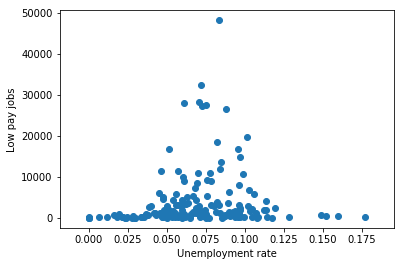

In [25]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create scatter plot
unemployment_rate = recent_grads["unemployment_rate"]
low_wage_jobs = recent_grads["low_wage_jobs"]
plt.scatter(unemployment_rate, low_wage_jobs)

# Label x axis
plt.xlabel('Unemployment rate')

# Label y axis
plt.ylabel('Low pay jobs')

# Display the graph 
plt.show()

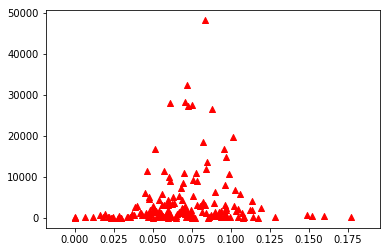

In [26]:
# Plot the red and triangle shaped scatter plot  
plt.scatter(unemployment_rate, low_wage_jobs, color = 'r', marker = '^')

# Display the visualization
plt.show()


# Plotting Histograms

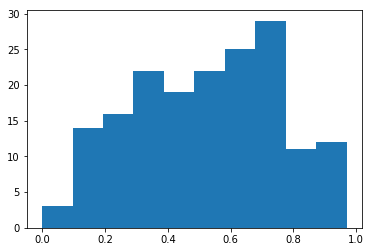

In [27]:
# Plot a histogram of sharewomen
plt.hist(recent_grads["sharewomen"])

# Show the plot
plt.show()

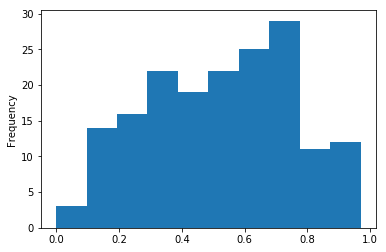

In [28]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create histogram
recent_grads.sharewomen.plot(kind='hist')
plt.show()

# Plotting One Bar Graphs

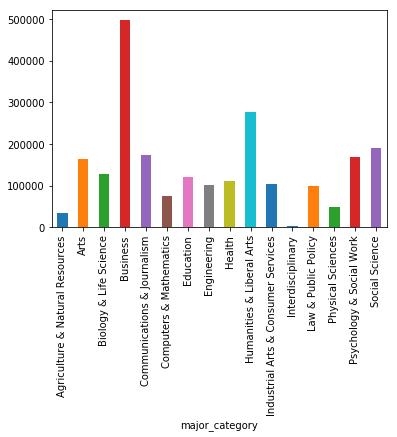

In [29]:
# DataFrame of non-college job sums
df = recent_grads.groupby(['major_category']).non_college_jobs.sum()

# Plot bar chart
df.plot(kind = 'bar')

# Show graph
plt.show()

# Dropping Missing Values

In [30]:
# Print the size of the DataFrame
print(recent_grads.size)

# Drop all rows with a missing value
recent_grads = recent_grads.dropna()

# Print the size of the DataFrame
print(recent_grads.size)

3979
3887


# Plotting Quantiles of Salary

In [31]:
# Convert to numeric and divide by 1000
recent_grads['median'] = (pd.to_numeric(recent_grads['median']))/1000
recent_grads['p25th'] = (pd.to_numeric(recent_grads['p25th']))/1000
recent_grads['p75th'] = (pd.to_numeric(recent_grads['p75th']))/1000

# Select averages by major category
columns = ['median', 'p25th', 'p75th']
sal_quantiles = recent_grads.groupby('major_category')['median', 'p25th', 'p75th'].mean()
#print(sal_quantiles)